In [1]:
import numpy as np
import pandas as pd

In [104]:
df = pd.read_csv('D:\projects\LARGE Projects\poems_classification\Poem_classification - train_data.csv')
df2 = pd.read_csv('D:\projects\LARGE Projects\poems_classification\Poem_classification - test_data.csv')


In [3]:
df = df.dropna(subset=['Poem'])
df.head(10)

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
6,Music,For Frank X WalkerFXW: I don’t know how to sw...
7,Music,My neighbor to the left had a stroke a couple...
8,Music,—for a sixty-seven-pound nugget of Lake Superi...
9,Music,—Issa Rae Everybody Black is my hometown team....
10,Music,"""Save your hands,” my mother says, seeing me u..."


In [4]:
df.head(10)

,Genre,Poem
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
6,Music,For Frank X WalkerFXW: I don’t know how to sw...
7,Music,My neighbor to the left had a stroke a couple...
8,Music,—for a sixty-seven-pound nugget of Lake Superi...
9,Music,—Issa Rae Everybody Black is my hometown team....
10,Music,"""Save your hands,” my mother says, seeing me u..."


In [106]:
df2.dropna(subset=['Poem'], inplace=True)

In [107]:
df2

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


### TFIDF Encoding

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=10000,stop_words='english',min_df=3,max_df=0.3)
vectorizer.fit(df['Poem'])

x = vectorizer.transform(df['Poem'])

feature_names = vectorizer.get_feature_names_out()
print("length of feature_names:",len(feature_names))
print("length of x:",len(x.toarray()))

final_df = pd.DataFrame(x.toarray(), columns = feature_names)

length of feature_names: 1568
length of x: 837


In [111]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3),max_features=10000,stop_words='english',min_df=3,max_df=0.3)
vectorizer.fit(df2['Poem'])

x = vectorizer.transform(df2['Poem'])

feature_names = vectorizer.get_feature_names_out()
print("length of feature_names:",len(feature_names))
print("length of x:",len(x.toarray()))

final_df = pd.DataFrame(x.toarray(), columns = feature_names)

length of feature_names: 247
length of x: 150


In [112]:
feature_names[4]

'away'

In [113]:
final_df

,ah,air,arm,autumn,away,beautiful,beauty,bed,bee,behold,...,wind,window,woman,women,woods,words,world,years,yellow,youth
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.548158,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.375864,0.0,0.0,0.0
3,0.0,0.421522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
146,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
148,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.546191,0.0,0.000000,0.0,0.0,0.0


In [114]:
#sentence transformers encoding

In [115]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings = model.encode(df['Poem'].tolist(), show_progress_bar=True)

Batches:   7%|▋         | 2/27 [00:04<00:54,  2.18s/it]


KeyboardInterrupt: 

In [20]:
print(len(embeddings))
print(len(embeddings[0]))

837
384


### Train Test SplitZ

In [22]:
from sklearn.model_selection import train_test_split

xtrainem,xtestem,ytrainem,ytestem = train_test_split(embeddings,df['Genre'],test_size=0.2,random_state=42)
xtraintf,xtesttf,ytraintf,ytesttf = train_test_split(x,df['Genre'],test_size=0.2,random_state=42)

### Random forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfem = RandomForestClassifier(n_estimators=100,random_state=42)
rftf = RandomForestClassifier(n_estimators=100,random_state=42)

rfem.fit(xtrainem,ytrainem)
rftf.fit(xtraintf,ytraintf)

ypredrm = rfem.predict(xtestem)
ypredrf = rftf.predict(xtesttf)

print("Accuracy of sentence transformer model:",accuracy_score(ytestem,ypredrm))
print("Accuracy of tfidf model:",accuracy_score(ytesttf,ypredrf))

print("classification report of sentence transformer model:\n",classification_report(ytestem,ypredrm))
print("classification report of tfidf model:\n",classification_report(ytesttf,ypredrf))

Accuracy of sentence transformer model: 0.49404761904761907
Accuracy of tfidf model: 0.4583333333333333
classification report of sentence transformer model:
               precision    recall  f1-score   support

   Affection       0.47      0.32      0.38        22
       Death       0.41      0.42      0.42        45
 Environment       0.63      0.69      0.65        54
       Music       0.42      0.43      0.42        47

    accuracy                           0.49       168
   macro avg       0.48      0.46      0.47       168
weighted avg       0.49      0.49      0.49       168

classification report of tfidf model:
               precision    recall  f1-score   support

   Affection       0.35      0.27      0.31        22
       Death       0.51      0.44      0.48        45
 Environment       0.58      0.56      0.57        54
       Music       0.35      0.45      0.39        47

    accuracy                           0.46       168
   macro avg       0.45      0.43      0.4

### Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression

lrem = LogisticRegression(max_iter=1000,random_state=42)
lrtf = LogisticRegression(max_iter=1000,random_state=42)

lrem.fit(xtrainem,ytrainem)
lrtf.fit(xtraintf,ytraintf)

ypredlm = lrem.predict(xtestem)
ypredlf = lrtf.predict(xtesttf)

print("Accuracy of sentence transformer model:",accuracy_score(ytestem,ypredlm))
print("Accuracy of tfidf model:",accuracy_score(ytesttf,ypredlf))

print("classification report of sentence transformer model:\n",classification_report(ytestem,ypredlm))
print("classification report of tfidf model:\n",classification_report(ytesttf,ypredlf))



Accuracy of sentence transformer model: 0.6130952380952381
Accuracy of tfidf model: 0.44642857142857145
classification report of sentence transformer model:
               precision    recall  f1-score   support

   Affection       0.39      0.50      0.44        22
       Death       0.71      0.53      0.61        45
 Environment       0.66      0.72      0.69        54
       Music       0.62      0.62      0.62        47

    accuracy                           0.61       168
   macro avg       0.59      0.59      0.59       168
weighted avg       0.63      0.61      0.61       168

classification report of tfidf model:
               precision    recall  f1-score   support

   Affection       0.17      0.09      0.12        22
       Death       0.41      0.40      0.40        45
 Environment       0.57      0.59      0.58        54
       Music       0.41      0.49      0.45        47

    accuracy                           0.45       168
   macro avg       0.39      0.39      0.3

### K-Means Try

In [116]:
final_df.T.nlargest(5,0)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
dog,0.575908,0.0,0.0,0.0,0.59417,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
woman,0.548158,0.0,0.0,0.0,0.00000,0.358566,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
tell,0.506314,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
like,0.333915,0.0,0.0,0.0,0.00000,0.000000,0.198259,0.0,0.0,0.162026,...,0.0,0.0,0.277849,0.0,0.0,0.0,0.218245,0.0,0.0,0.0
ah,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [117]:
# Data Structures
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

In [118]:
#K means training

In [119]:
def run_Kmeans(max_k,data):
    max_k+=1
    kmeans_result = dict()
    for k in range(2,max_k):
        kmeans = cluster.KMeans(
            n_clusters=k,
            init="k-means++", #defines the initial cluster centers.
            n_init=50,
            tol = 0.0001,#distance from all samples to centroid should be larger than tol(tolerence)
            random_state=1,#give reproducable results
            algorithm="full"
        )

        kmeans_result.update({k:kmeans.fit(data)})
    return kmeans_result

In [120]:
#silhoutte score

In [121]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(),reverse=True):
        print(f"Average Silhouette Score for {avg_dict[avg]} clusters: {avg}")

def plotSilhouette(df,n_clusters,kmeans_labels,silhouette_avg):
    fig,ax1 = plt.subplots(1)
    fig.set_size_inches(8,6)
    ax1.set_xlim([-0.2,1])
    ax1.set_ylim([0,len(df)+(n_clusters+1)*10])

    ax1.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters")

    y_lower = 10
    sample_silhouette_values = silhouette_samples(df,kmeans_labels) #calculates the silohutte score for each cluster

    for i in range(n_clusters):
        ith_cluster = sample_silhouette_values[kmeans_labels==i] #extract s score of a particular cluster
        ith_cluster.sort()

        size_cluster_i = ith_cluster.shape[0] #number of elemts in that cluster
        y_upper = y_lower + size_cluster_i #height of the plot

        color = cm.nipy_spectral(float(i)/n_clusters) #color of the plot
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster,facecolor=color,edgecolor=color,alpha=0.7) #fill the plot with color

        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) #label the plot with cluster number
        y_lower = y_upper+10 #update the height of the plot
    plt.show()

def silhouette(kmeans_dict,df,plot=False):
    df = df.to_numpy()
    avg_silhouette = dict()

    for n_clusters,kmeans in kmeans_dict.items():
        kmeans_labels = kmeans.predict(df)
        print(f"{n_clusters} kmeans labels:",kmeans_labels)
        silhouette_avg = silhouette_score(df,kmeans_labels)
        avg_silhouette.update({silhouette_avg:n_clusters})

        if plot:
            plotSilhouette(df,n_clusters,kmeans_labels,silhouette_avg)
    printAvg(avg_silhouette)


In [122]:
k = 8
kmeans_result = run_Kmeans(k,final_df)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 

In [123]:
kmeans_result

{2: KMeans(algorithm='full', n_clusters=2, n_init=50, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, n_init=50, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, n_init=50, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, n_init=50, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, n_init=50, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, n_init=50, random_state=1),
 8: KMeans(algorithm='full', n_init=50, random_state=1)}

2 kmeans labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


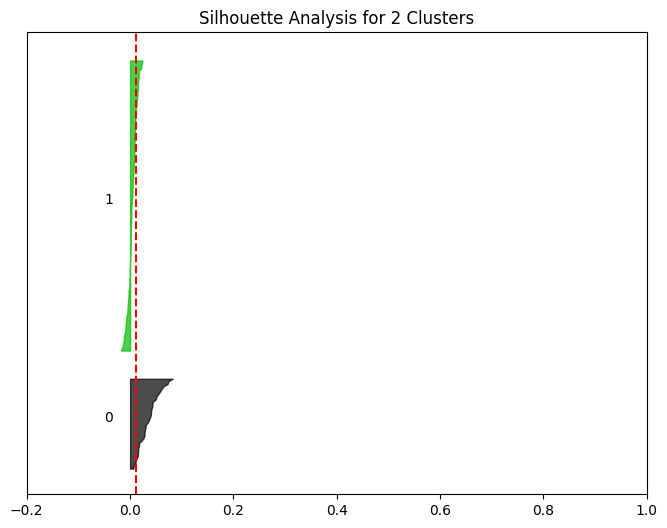

3 kmeans labels: [2 0 0 2 2 0 2 0 0 2 0 0 2 0 2 0 1 0 2 2 0 2 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 0 1 2 0 0 2 2 1 1 2 0 1 2 0 1 0 0 0 0 1 1 1 1 2 0 1 0 0 0 0 1 1 0 2 0
 1 0 2 0 2 1 1 2 2 0 2 0 2 0 2 0 0 1 2 0 2 2 0 1 0 0 0 2 1 0 0 0 1 1 0 2 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 1 2 0 2 0 1 2 0 0 0 2 0 2 2 2 1 0 2 2 0 0 2 2 0
 0 2]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


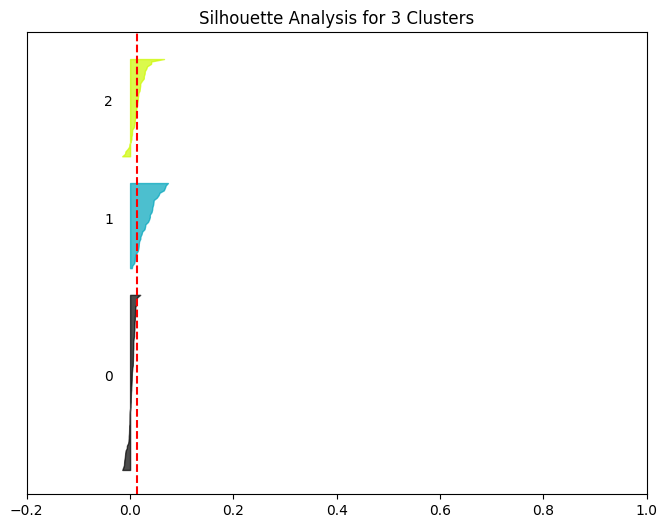

4 kmeans labels: [3 0 2 3 0 3 3 0 2 0 3 0 0 2 3 0 1 2 0 2 0 2 0 0 2 1 1 3 1 1 1 2 0 0 0 1 0
 1 0 0 0 3 2 0 1 2 1 0 3 0 1 3 0 0 0 2 3 2 1 1 1 1 3 0 1 3 0 0 0 1 1 0 3 0
 2 0 3 0 2 1 1 0 3 3 0 0 3 0 0 2 1 0 2 1 0 3 3 3 0 0 0 3 1 0 0 0 1 1 0 2 0
 3 0 0 0 0 0 0 3 1 0 2 1 1 3 3 3 3 2 0 3 0 2 0 3 0 2 2 2 1 0 2 2 2 2 0 3 0
 0 2]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


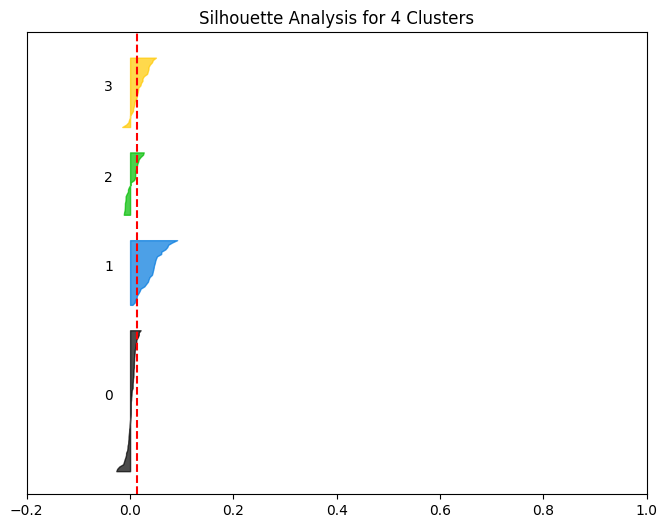

5 kmeans labels: [4 0 0 3 0 0 4 2 0 4 0 3 0 3 4 2 2 0 2 2 3 2 0 0 2 1 1 2 0 1 0 2 1 0 3 0 0
 1 0 0 1 4 0 2 1 2 1 1 4 2 1 4 4 3 0 3 0 0 1 1 1 1 4 0 1 0 2 1 1 0 2 3 4 0
 0 3 4 0 4 1 0 2 3 0 1 2 2 0 3 0 1 3 3 2 3 4 0 1 0 0 2 4 2 0 0 0 1 3 2 4 3
 0 2 3 2 2 3 0 0 1 3 3 1 2 0 4 0 2 0 0 4 0 2 2 4 0 3 3 4 1 0 2 4 0 0 3 4 0
 0 3]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


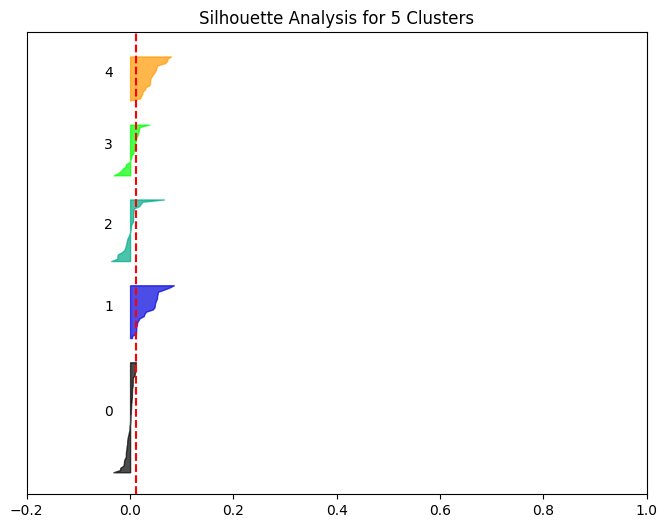

6 kmeans labels: [2 0 0 3 5 5 1 3 5 1 0 3 0 5 1 0 4 0 0 0 5 0 0 1 0 2 2 4 4 4 0 0 0 3 0 3 0
 4 0 5 4 1 0 5 4 5 4 4 1 5 2 1 2 5 5 5 0 5 4 4 2 4 1 0 5 1 0 2 0 3 3 3 1 0
 4 4 1 0 5 4 2 5 1 0 4 0 1 2 0 0 4 3 5 0 0 1 1 4 2 3 1 1 4 5 0 0 4 4 0 1 5
 0 4 0 0 4 3 0 5 4 3 0 4 0 2 1 0 5 0 0 1 0 5 5 1 5 4 1 1 4 0 0 5 0 2 0 1 5
 5 0]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


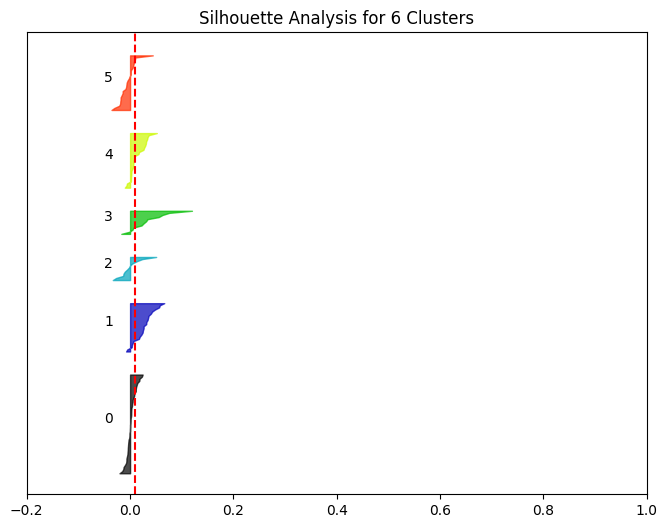

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


7 kmeans labels: [3 1 1 4 3 6 1 2 1 3 6 1 4 1 3 1 5 1 5 4 1 4 5 2 1 5 5 0 6 5 1 1 6 0 1 1 6
 5 4 3 6 3 4 1 1 4 5 5 3 1 5 3 1 5 1 0 1 1 5 0 5 6 3 3 5 6 6 6 5 1 0 1 3 3
 4 2 3 6 3 5 6 1 2 3 1 4 3 1 1 1 5 1 3 3 1 2 6 5 0 1 3 0 5 1 1 1 5 5 6 3 2
 0 1 1 0 3 1 1 3 5 2 1 5 4 6 3 2 3 1 1 3 1 1 6 3 6 0 4 3 5 2 4 3 1 6 2 4 6
 1 2]


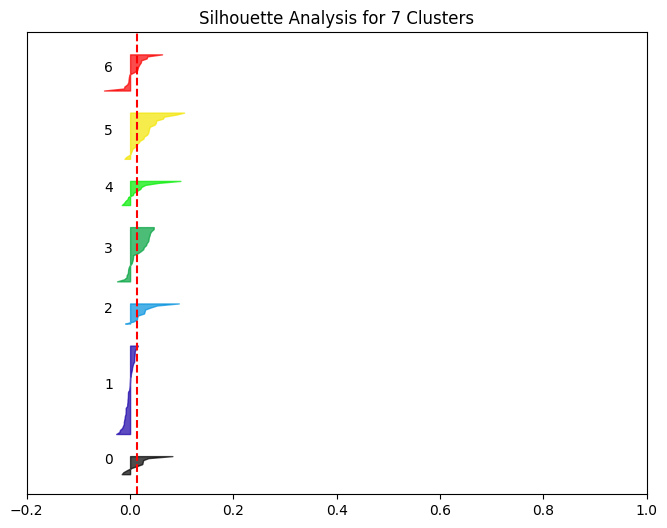

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


8 kmeans labels: [7 4 6 1 7 7 3 0 6 1 2 3 1 2 7 3 0 3 3 4 3 1 4 3 3 7 0 4 6 2 5 6 0 3 3 2 3
 0 7 2 3 7 3 3 0 4 0 4 6 0 0 0 3 0 3 2 4 2 5 5 5 5 7 1 2 2 3 3 3 0 2 1 1 2
 6 0 7 1 6 0 7 1 0 7 1 3 3 5 4 3 0 5 2 4 3 7 3 0 3 3 1 5 0 1 1 3 0 0 3 6 3
 1 1 3 4 7 4 3 0 0 4 3 0 4 7 7 3 0 6 3 7 1 2 3 6 3 4 6 6 0 3 3 2 4 2 4 1 3
 3 3]


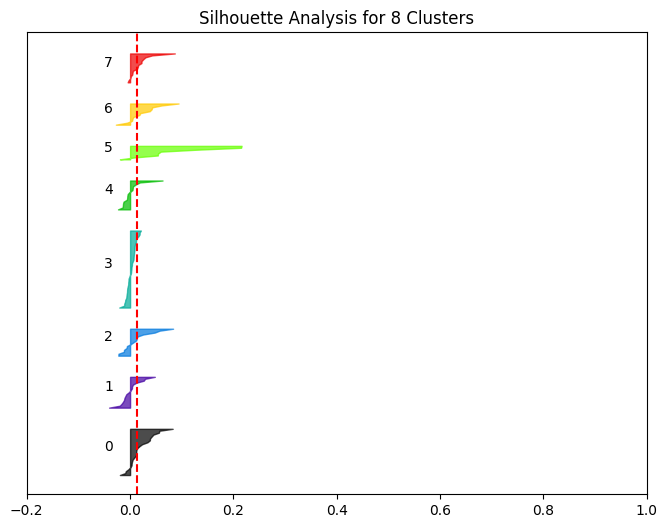

Average Silhouette Score for 8 clusters: 0.013601930542032481
Average Silhouette Score for 4 clusters: 0.012645357562142644
Average Silhouette Score for 7 clusters: 0.012592763609433368
Average Silhouette Score for 3 clusters: 0.012570437903950451
Average Silhouette Score for 5 clusters: 0.011925149767240465
Average Silhouette Score for 2 clusters: 0.01118925430700715
Average Silhouette Score for 6 clusters: 0.008859889878282927


In [124]:
silhouette(kmeans_result,final_df,plot=True)

In [125]:
#common words visualizartion

In [126]:
def plotWords(label,df,n_feats):
    plt.figure(figsize=(8, 6))
    plt.title(f"Most Common Words in Cluster {label}")
    sns.barplot(x = 'score' , y = 'features' , data = df[:n_feats])
    plt.show()

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = feature_names
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
        print("\nCluster %d:" % label)
        print(tf_idf_array[id_temp])
        print(df.head(10))
        print("id_temp:",id_temp)
        print("x_means",x_means)
        print("SORTED MEANS:",sorted_means)
        print("features:",features)
        print("best features:",best_features)
        plotWords(label,df,n_feats)
    return dfs



(array([ 16,  25,  26,  28,  29,  32,  35,  37,  40,  46,  50,  53,  58,
        59,  60,  61,  64,  65,  69,  70,  79,  84,  90,  91,  97, 102,
       106, 107, 108, 119, 122, 123, 124, 135, 136, 139], dtype=int64),)
[0.01742014 0.01058733 0.00799795 0.01423679 0.         0.00706357
 0.         0.         0.03000648 0.         0.01939307 0.01332943
 0.         0.         0.         0.         0.02502364 0.01404067
 0.00666002 0.         0.01698081 0.01064814 0.01092971 0.
 0.00644038 0.         0.03062817 0.         0.         0.
 0.         0.00889566 0.         0.02169909 0.0813282  0.00596168
 0.00929593 0.01956995 0.         0.02741745 0.00931568 0.
 0.02265472 0.         0.         0.         0.01008473 0.00887935
 0.01802535 0.00884801 0.         0.00698332 0.01381902 0.
 0.00742846 0.         0.05376648 0.02671199 0.         0.02253952
 0.00634358 0.         0.00830282 0.01730335 0.         0.
 0.         0.         0.01711987 0.00984276 0.01592852 0.0067714
 0.00914606 0.01837

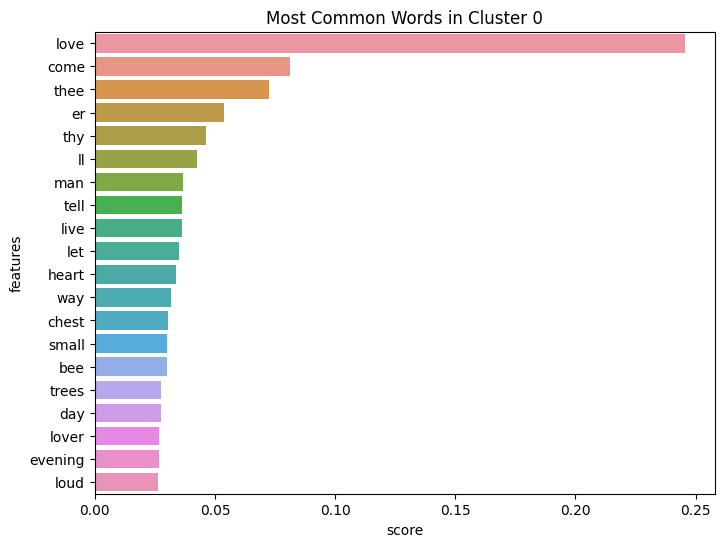


Cluster 1:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  features     score
0     like  0.066934
1    world  0.032416
2     time  0.029929
3    night  0.024443
4     long  0.023672
5      say  0.023208
6     hand  0.021939
7     body  0.021367
8      sky  0.021325
9     moon  0.020960
id_temp: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  17,  18,  19,  20,  21,  22,  23,  24,  27,  30,
        31,  33,  34,  36,  38,  39,  41,  42,  43,  44,  45,  47,  48,
        49,  51,  52,  54,  55,  56,  57,  62,  63,  66,  67,  68,  71,
        72,  73,  74,  75,  76,  77,  78,  80,  81,  82,  83,  85,  86,
        87,  88,  89,  92,  93,  94,  95,  96,  98,  99, 100, 101, 103,
       104, 105, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120,
       121, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138,
       140, 141

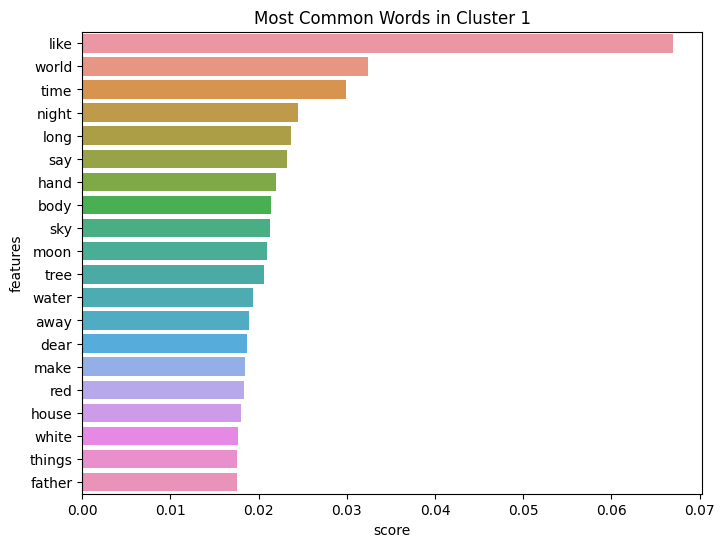

In [130]:
best_result = 2
kmeans = kmeans_result[best_result]

final_df_arr = final_df.to_numpy()
prediction = kmeans.predict(final_df)
temp = np.where(prediction==0)
print(temp)
print(np.mean(final_df_arr[temp],axis=0))
print(np.argsort(np.mean(final_df_arr[temp],axis=0))[::-1][:20])
means = np.mean(final_df_arr[temp], axis = 0)
print(means)
n_feats = 20
dfs = get_top_features_cluster(final_df_arr,prediction,n_feats)